<a href="https://colab.research.google.com/github/Luis-Amagua/Curso_intro_redes_neuronales/blob/main/4Red_Neuronal_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creando una red neuronal usando numpy

In [53]:
import numpy as np
# se cambia a GPU en colab: Entorno de ejecucion// cambiar entorno de ejcucion// GPU
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles


In [54]:
N=1000 # ejemplos
gaussian_quantiles=make_gaussian_quantiles(mean=None, 
                        cov=0.1,
                        n_samples=N,
                        n_features=2, # caracteristicas
                        n_classes=2,
                        shuffle=True,
                        random_state=None)# circulos gausianos
X,Y =gaussian_quantiles

In [55]:
print(X.shape)
print(Y.shape) # es un vector

(1000, 2)
(1000,)


In [56]:
Y=Y[:,np.newaxis]

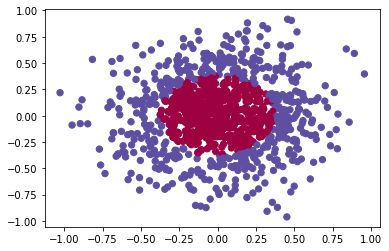

In [57]:
plt.scatter(X[:,0],X[:,1],c=Y[:,0],s=40,cmap=plt.cm.Spectral)

se necesita una red neuronal que sea capaz de dstingir que en el centro está una clase y a los bordos otra clase

In [58]:
# funciones de activacion

def sigmoid(x, derivate = False):
    if derivate:
        return np.exp(-x)/(( np.exp(-x) +1)**2)
    else:    
        return 1 / (1 + np.exp(-x))

def relu(x, derivate = False):
    if derivate:
        x[x <= 0] = 0
        x[x > 0 ] = 1
        return x
    else:    
        return np.maximum(0, x)

In [59]:
# funcion de perdida
def mse(y, y_hat, derivate = False):
  if derivate:
    return (y_hat - y)
  else:
    return np.mean((y_hat - y)**2)

In [60]:
# cada neurona tiene pesos y bias

def initialize_parameters_deep(layers_dim):
  parameters={}
  L=len(layers_dim)
  for l in range(0,L-1):
    parameters['W'+str(l+1)]=(np.random.rand(layers_dim[l], layers_dim[l+1])*2)-1
    parameters['b'+str(l+1)]=(np.random.rand(1, layers_dim[l+1])*2)-1
  return parameters



In [61]:
 np.random.rand(10,3) # tamaño matrix 10x3

array([[0.96985273, 0.31403025, 0.00475568],
       [0.71053348, 0.50121677, 0.89705854],
       [0.14745334, 0.04870648, 0.190317  ],
       [0.90216233, 0.05540791, 0.43287845],
       [0.89905973, 0.34590525, 0.5588114 ],
       [0.80673266, 0.24399481, 0.12902114],
       [0.54019606, 0.30100823, 0.31836161],
       [0.88823238, 0.34289882, 0.8993621 ],
       [0.81869174, 0.91484357, 0.63517876],
       [0.55181967, 0.84425442, 0.14483655]])

In [62]:
layer_dim=[2,4,8,1]# numero de neuronas en cada capa y desemboca en una neurona, ie, numero de neuronas por cada capa


In [63]:
params=initialize_parameters_deep(layer_dim)
params

{'W1': array([[ 0.42466085, -0.33515974, -0.4888914 ,  0.29044491],
        [ 0.88093411, -0.39011831,  0.76686956, -0.72010899]]),
 'b1': array([[ 0.26238925,  0.26577166, -0.17363292, -0.89506726]]),
 'W2': array([[-0.48843235,  0.75053712,  0.63607404,  0.72840555, -0.83190252,
          0.89161854, -0.95472055,  0.09730164],
        [-0.09959912, -0.23758513, -0.5099792 , -0.40127365, -0.70306444,
          0.92450314,  0.20074124,  0.32266136],
        [-0.7091261 ,  0.56785287,  0.34501896, -0.14839365, -0.25862437,
          0.53856198,  0.98043468,  0.56564095],
        [-0.73114883,  0.10911551, -0.17708699, -0.3005785 ,  0.05870486,
          0.93879321,  0.66575278,  0.98834401]]),
 'b2': array([[ 0.23063321, -0.86833865, -0.89486919, -0.97813108, -0.57339365,
          0.85592486,  0.80959762,  0.50769136]]),
 'W3': array([[-9.75308032e-01],
        [ 1.41792589e-01],
        [-2.74138298e-01],
        [-1.70336773e-01],
        [-1.55993920e-01],
        [ 3.76167515e-04],

## __Entrenamiento forward de la red neuronal__

In [64]:
print(params['W1'])
params['W1'].shape

[[ 0.42466085 -0.33515974 -0.4888914   0.29044491]
 [ 0.88093411 -0.39011831  0.76686956 -0.72010899]]


(2, 4)

In [65]:
X.shape

(1000, 2)

In [66]:
#se puede hace rel producto entre los dos
np.matmul(X,params['W1']).shape # este resultado va a la siguiente red con 4 neuronas
X@params['W1'] # tambien es producto punto con "@"

array([[ 0.13614853, -0.08870406, -0.04730521,  0.0118501 ],
       [-0.07335257,  0.04900826,  0.03259139, -0.01166057],
       [ 0.35622977, -0.18811813,  0.13288699, -0.1595924 ],
       ...,
       [ 0.12024805, -0.02713148,  0.25712978, -0.21150718],
       [-0.58452091,  0.30903425, -0.21594729,  0.26030769],
       [-0.0041186 , -0.04457978, -0.27442538,  0.20449482]])

In [67]:
params
params['A0']=X

params['Z1']=np.matmul(params['A0'],params['W1'])+params['b1']
# se añade una funcion de activacion
params['A1']=relu(params['Z1'])

params['Z2']=np.matmul(params['A1'],params['W2'])+params['b2']
params['A2']=relu(params['Z2'])

params['Z3']=np.matmul(params['A2'],params['W3'])+params['b3']
# la ultima capa tiene dos salidas y se asigna una prob, por eso se toma sigmoid
params['A3']=sigmoid(params['Z3'])



In [68]:
output=params['A3']

print(output.shape)
#print(output)

(1000, 1)


# Bakcpropagation

toma la última capa de la predicción, pasa por la funcion de perdida y propaga ese error para atrás

In [69]:
# se empiea por las deltas  de la última capa

params['dZ3']=mse(Y,output, True)*sigmoid(params['Z3'],True)
print(params['dZ3'].shape)
print(params['A2'].shape) # no se puede hacer el producto punto
print(params['A2'].T.shape) # aqui si s epued ehacer e product punto
params['dW3']=np.matmul(params['A2'].T,params['dZ3'])

(1000, 1)
(1000, 8)
(8, 1000)


In [70]:
params['dZ2']=np.matmul(params['dZ3'],params['W3'].T)*relu(params['A2'],True)
params['dW2']=np.matmul(params['A1'].T,params['dZ2'])

params['dZ1']=np.matmul(params['dZ2'],params['W2'].T)*relu(params['A1'],True)
params['dW1']=np.matmul(params['A0'].T,params['dZ1'])

In [72]:
# para propagar el error se hace el decenso del gradiente
# gradient descent

params['W3']=params['W3']-params['dW3']*0.001 # el ultimo valor es el Learning rate (LR)
params['b3']=params['b3']-(np.mean(params['dW3'],axis=0, keepdims=True))*0.001

params['W2']=params['W2']-params['dW2']*0.001 # el ultimo valor es el Learning rate (LR)
params['b2']=params['b2']-(np.mean(params['dW2'],axis=0, keepdims=True))*0.001

params['W1']=params['W1']-params['dW1']*0.001 # el ultimo valor es el Learning rate (LR)
params['b1']=params['b1']-(np.mean(params['dW1'],axis=0, keepdims=True))*0.001

Se puede crear una función para acoplar todo este proceso


In [73]:
# funcion unificada
# es una funcion de entranamiento de una red neuronal, haciendo forward, backprpagation y gradient descent(para actualizar los pesos)

def train(x_data, lr, params, training=True):
  # forward
  params['A0']=x_data

  params['Z1']=np.matmul(params['A0'],params['W1'])+params['b1']
  params['A1']=relu(params['Z1'])

  params['Z2']=np.matmul(params['A1'],params['W2'])+params['b2']
  params['A2']=relu(params['Z2'])

  params['Z3']=np.matmul(params['A2'],params['W3'])+params['b3']
  params['A3']=sigmoid(params['Z3'])
  output=params['A3']

  if training: 
  # backpropagation
    params['dZ3']=mse(Y,output, True)*sigmoid(params['Z3'],True)
    params['dW3']=np.matmul(params['A2'].T,params['dZ3'])

    params['dZ2']=np.matmul(params['dZ3'],params['W3'].T)*relu(params['A2'],True)
    params['dW2']=np.matmul(params['A1'].T,params['dZ2'])

    params['dZ1']=np.matmul(params['dZ2'],params['W2'].T)*relu(params['A1'],True)
    params['dW1']=np.matmul(params['A0'].T,params['dZ1'])

  #gradient descent
    params['W3']=params['W3']-params['dW3']*lr # el ultimo valor es el Learning rate (LR)
    params['b3']=params['b3']-(np.mean(params['dW3'],axis=0, keepdims=True))*lr

    params['W2']=params['W2']-params['dW2']*lr # el ultimo valor es el Learning rate (LR)
    params['b2']=params['b2']-(np.mean(params['dW2'],axis=0, keepdims=True))*lr
    params['W1']=params['W1']-params['dW1']*lr # el ultimo valor es el Learning rate (LR)
    params['b1']=params['b1']-(np.mean(params['dW1'],axis=0, keepdims=True))*lr
  return output

In [96]:
# vamos a entrenar la red

layer_dims=[2,4,8,1]
params=initialize_parameters_deep(layer_dims)
errors=[]

for _ in range(5000):
  output=train(X,0.0001,params)
  if _ % 25==0:
    print(mse(Y,output))
    errors.append(mse(Y,output))


0.26334813916597083
0.2582953551558705
0.2554492536984614
0.2529986725708412
0.2507729863852762
0.2485103299970761
0.24641653409762285
0.24486337640983424
0.24369919985994346
0.24278903565425072
0.24200753590680088
0.241306037326827
0.2406704347702049
0.24009380642649836
0.23955630802758904
0.23903686228252002
0.23852905270070107
0.2380277531188234
0.23753110611169703
0.23703147767607294
0.23652453290679765
0.2360067853249362
0.2354818219710576
0.23494676059235503
0.23440203285302902
0.23384602671445925
0.23327948954738975
0.23269933830811168
0.2321054386953345
0.2314976617500088
0.23087524489225397
0.23023827833513547
0.22958661309442993
0.2289186463419273
0.22823350836175957
0.22752740694000914
0.2268051552763785
0.22606780399936957
0.22530897796117635
0.22452993892437956
0.2237320507872031
0.22291031360274194
0.22206971620351124
0.22120755820665755
0.2203243857270626
0.21941653999232363
0.21848372526002421
0.2175275673075021
0.21654546845817726
0.2155351104114407
0.21449183659628612

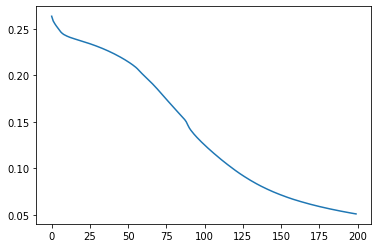

In [97]:
plt.plot(errors)



In [98]:

# ahora se prepara la data de prueba, se drea data aleatoria
data_test=(np.random.rand(1000,2)*2)-1
y=train(data_test, 0.001, params, training=False) # debe clasificar
y=np.where(y>=0.5,1,0)


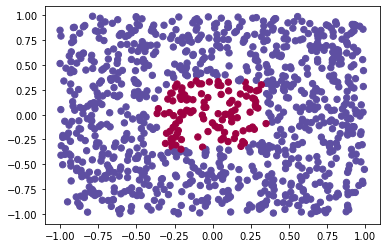

In [99]:
plt.scatter(data_test[:,0],data_test[:,1],c=y[:,0],s=40,cmap=plt.cm.Spectral)